In [1]:
import pandas as pd #pandas library
import seaborn as sns #seaborn charting built in matplotlib
from matplotlib import pyplot as plt #use matplotlib for tweaks
import numpy as np #for zero conversion
#keep plots in notebook
%matplotlib inline 

In [23]:
sb_full_menu = pd.read_csv('starbucks_drinkMenu_expanded.csv')
sb_drink_menu = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
sb_food_menu = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding = 'utf-16')

In [6]:
sb_full_menu.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [28]:
sb_full_menu = sb_full_menu.rename(columns={' Total Fat (g)': 'Total Fat', 'Trans Fat (g) ': 'Trans Fat',
                                            'Saturated Fat (g)': 'Saturated Fat', ' Sodium (mg)': 'Sodium',
                                            ' Total Carbohydrates (g) ': 'Total Carbohydrates',
                                            'Cholesterol (mg)': 'Cholesterol', ' Dietary Fibre (g)': 'Dietary Fibre',
                                            ' Sugars (g)': 'Sugars', ' Protein (g) ': 'Protein',
                                            'Vitamin A (% DV) ': 'Vitamin A (% DV)', ' Calcium (% DV) ': 'Calcium (% DV)',
                                            'Iron (% DV) ': 'Iron (% DV)', 'Caffeine (mg)': 'Caffeine'})
sb_full_menu.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium',
       'Total Carbohydrates', 'Cholesterol', 'Dietary Fibre', 'Sugars',
       'Protein', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine'],
      dtype='object')

In [31]:
sb_full_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [9]:
sb_drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [25]:
sb_food_menu.head()

,,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [26]:
print(sb_full_menu.shape)
print(sb_drink_menu.shape)
print(sb_food_menu.shape)

(242, 18)
(177, 7)
(113, 6)


In [29]:
print(sb_full_menu.dtypes)
print(sb_drink_menu.dtypes)
print(sb_food_menu.dtypes)

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat               object
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A (% DV)        object
Vitamin C (% DV)        object
Calcium (% DV)          object
Iron (% DV)             object
Caffeine                object
dtype: object
Unnamed: 0    object
Calories      object
Fat (g)       object
Carb. (g)     object
Fiber (g)     object
Protein       object
Sodium        object
dtype: object
                 object
 Calories         int64
 Fat (g)        float64
 Carb. (g)        int64
 Fiber (g)        int64
 Protein (g)      int64
dtype: object


In [35]:
sb_full_menu['Vitamin A (% DV)'] = "0." + sb_full_menu['Vitamin A (% DV)']
sb_full_menu['Vitamin C (% DV)'] = "0." + sb_full_menu['Vitamin C (% DV)']
sb_full_menu['Calcium (% DV)'] = "0." + sb_full_menu['Calcium (% DV)']
sb_full_menu['Iron (% DV)'] = "0." + sb_full_menu['Iron (% DV)']

# Remove "%" from percent columns
sb_full_menu = sb_full_menu.replace({'Vitamin A (% DV)': {'%': ''}, 'Vitamin C (% DV)': {'%': ''},
                                     'Calcium (% DV)': {'%': ''}, 'Iron (% DV)': {'%': ''}}, regex=True)

# 'Iron (% DV)' includes percentages in the form of #.00%, so we will need to do some more work
sb_full_menu = sb_full_menu.replace({'Iron (% DV)': {'.00': ''}}, regex=True)

# Replace troublesome entry
sb_full_menu.loc[237, 'Total Fat'] = '3.2'

In [36]:
sb_full_menu = sb_full_menu.replace({'Caffeine': {'Varies': None, 'varies': None}})

In [51]:
columns_to_change = ['Caffeine', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
sb_full_menu['Total Fat'] = pd.to_numeric(sb_full_menu['Total Fat'])
sb_full_menu['Caffeine'] = pd.to_numeric(sb_full_menu['Caffeine'])
sb_full_menu.dtypes

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat              float64
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A (% DV)        object
Vitamin C (% DV)        object
Calcium (% DV)          object
Iron (% DV)             object
Caffeine               float64
dtype: object

In [52]:
sb_drink_menu.replace('-', '', regex=True, inplace=True)
columns_to_change = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
sb_drink_menu[columns_to_change] = sb_drink_menu[columns_to_change].apply(pd.to_numeric)
sb_drink_menu.dtypes

Unnamed: 0     object
Calories      float64
Fat (g)       float64
Carb. (g)     float64
Fiber (g)     float64
Protein       float64
Sodium        float64
dtype: object

In [53]:
print(sb_full_menu.isna().sum())
print(sb_drink_menu.isna().sum())
print(sb_food_menu.isna().sum())

Beverage_category       0
Beverage                0
Beverage_prep           0
Calories                0
Total Fat               0
Trans Fat               0
Saturated Fat           0
Sodium                  0
Total Carbohydrates     0
Cholesterol             0
Dietary Fibre           0
Sugars                  0
Protein                 0
Vitamin A (% DV)        0
Vitamin C (% DV)        0
Calcium (% DV)          0
Iron (% DV)             0
Caffeine               23
dtype: int64
Unnamed: 0     0
Calories      85
Fat (g)       85
Carb. (g)     85
Fiber (g)     85
Protein       85
Sodium        85
dtype: int64
                0
 Calories       0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64


In [55]:
sb_drink_menu.dropna()
sb_drink_menu.isna().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [56]:
sb_full_menu.describe()

,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Caffeine
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,219.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,89.520548
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,64.726831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,50.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,75.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,142.500000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000


In [57]:
sb_drink_menu.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


Text(0.5, 1.0, 'Distribution of Calories')

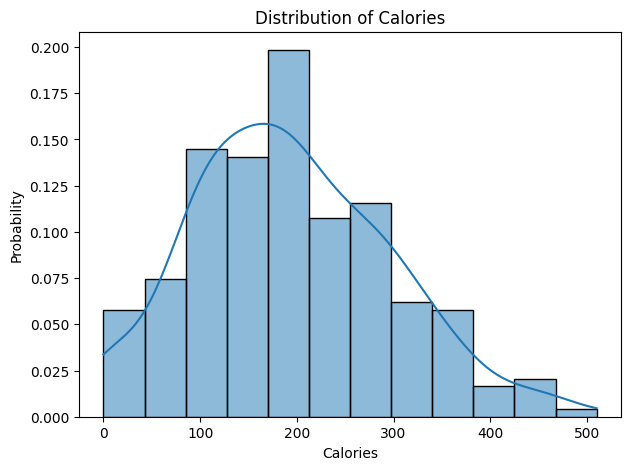

In [60]:
plt.figure(figsize=(7,5))
# kde - Generates the smooth line you see overlayed on the plot
# stat - By default the axis will be the count occurences, while "probability" turns it into a probability distribution
sns.histplot(data=sb_full_menu, x='Calories', kde=True, stat='probability').set_title('Distribution of Calories')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Classic Espresso Drinks'),
  Text(2, 0, 'Signature Espresso Drinks'),
  Text(3, 0, 'Tazo® Tea Drinks'),
  Text(4, 0, 'Shaken Iced Beverages'),
  Text(5, 0, 'Smoothies'),
  Text(6, 0, 'Frappuccino® Blended Coffee'),
  Text(7, 0, 'Frappuccino® Light Blended Coffee'),
  Text(8, 0, 'Frappuccino® Blended Crème')])

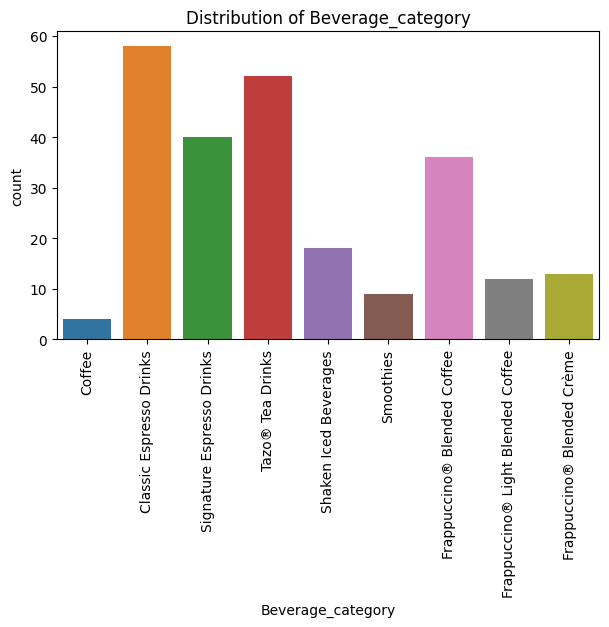

In [61]:
plt.figure(figsize=(7,4))
sns.countplot(data=sb_full_menu, x='Beverage_category').set_title('Distribution of Beverage_category')
plt.xticks(rotation=90) # Rotates x-axis labels 90 degrees

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Short'),
  Text(1, 0, 'Tall'),
  Text(2, 0, 'Grande'),
  Text(3, 0, 'Venti'),
  Text(4, 0, 'Short Nonfat Milk'),
  Text(5, 0, '2% Milk'),
  Text(6, 0, 'Soymilk'),
  Text(7, 0, 'Tall Nonfat Milk'),
  Text(8, 0, 'Grande Nonfat Milk'),
  Text(9, 0, 'Venti Nonfat Milk'),
  Text(10, 0, 'Solo'),
  Text(11, 0, 'Doppio'),
  Text(12, 0, 'Whole Milk')])

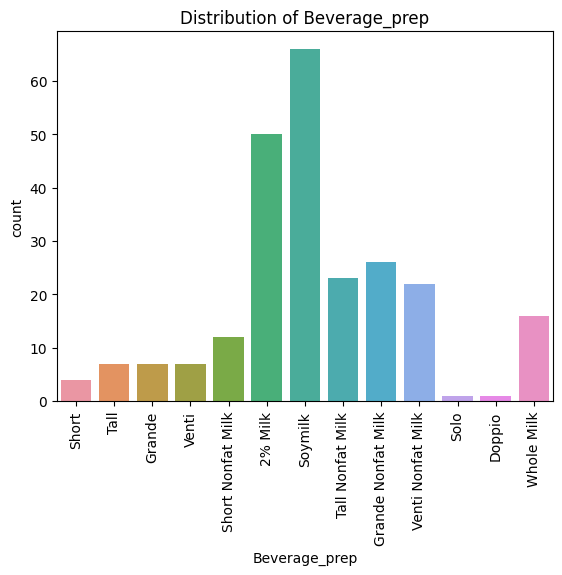

In [63]:
sns.countplot(data=sb_full_menu, x='Beverage_prep').set_title('Distribution of Beverage_prep') # Insert
plt.xticks(rotation=90)

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Total Fat'}>,
        <Axes: title={'center': 'Trans Fat'}>],
       [<Axes: title={'center': 'Saturated Fat'}>,
        <Axes: title={'center': 'Sodium'}>,
        <Axes: title={'center': 'Total Carbohydrates'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Dietary Fibre'}>,
        <Axes: title={'center': 'Sugars'}>],
       [<Axes: title={'center': 'Protein'}>,
        <Axes: title={'center': 'Caffeine'}>, <Axes: >]], dtype=object)

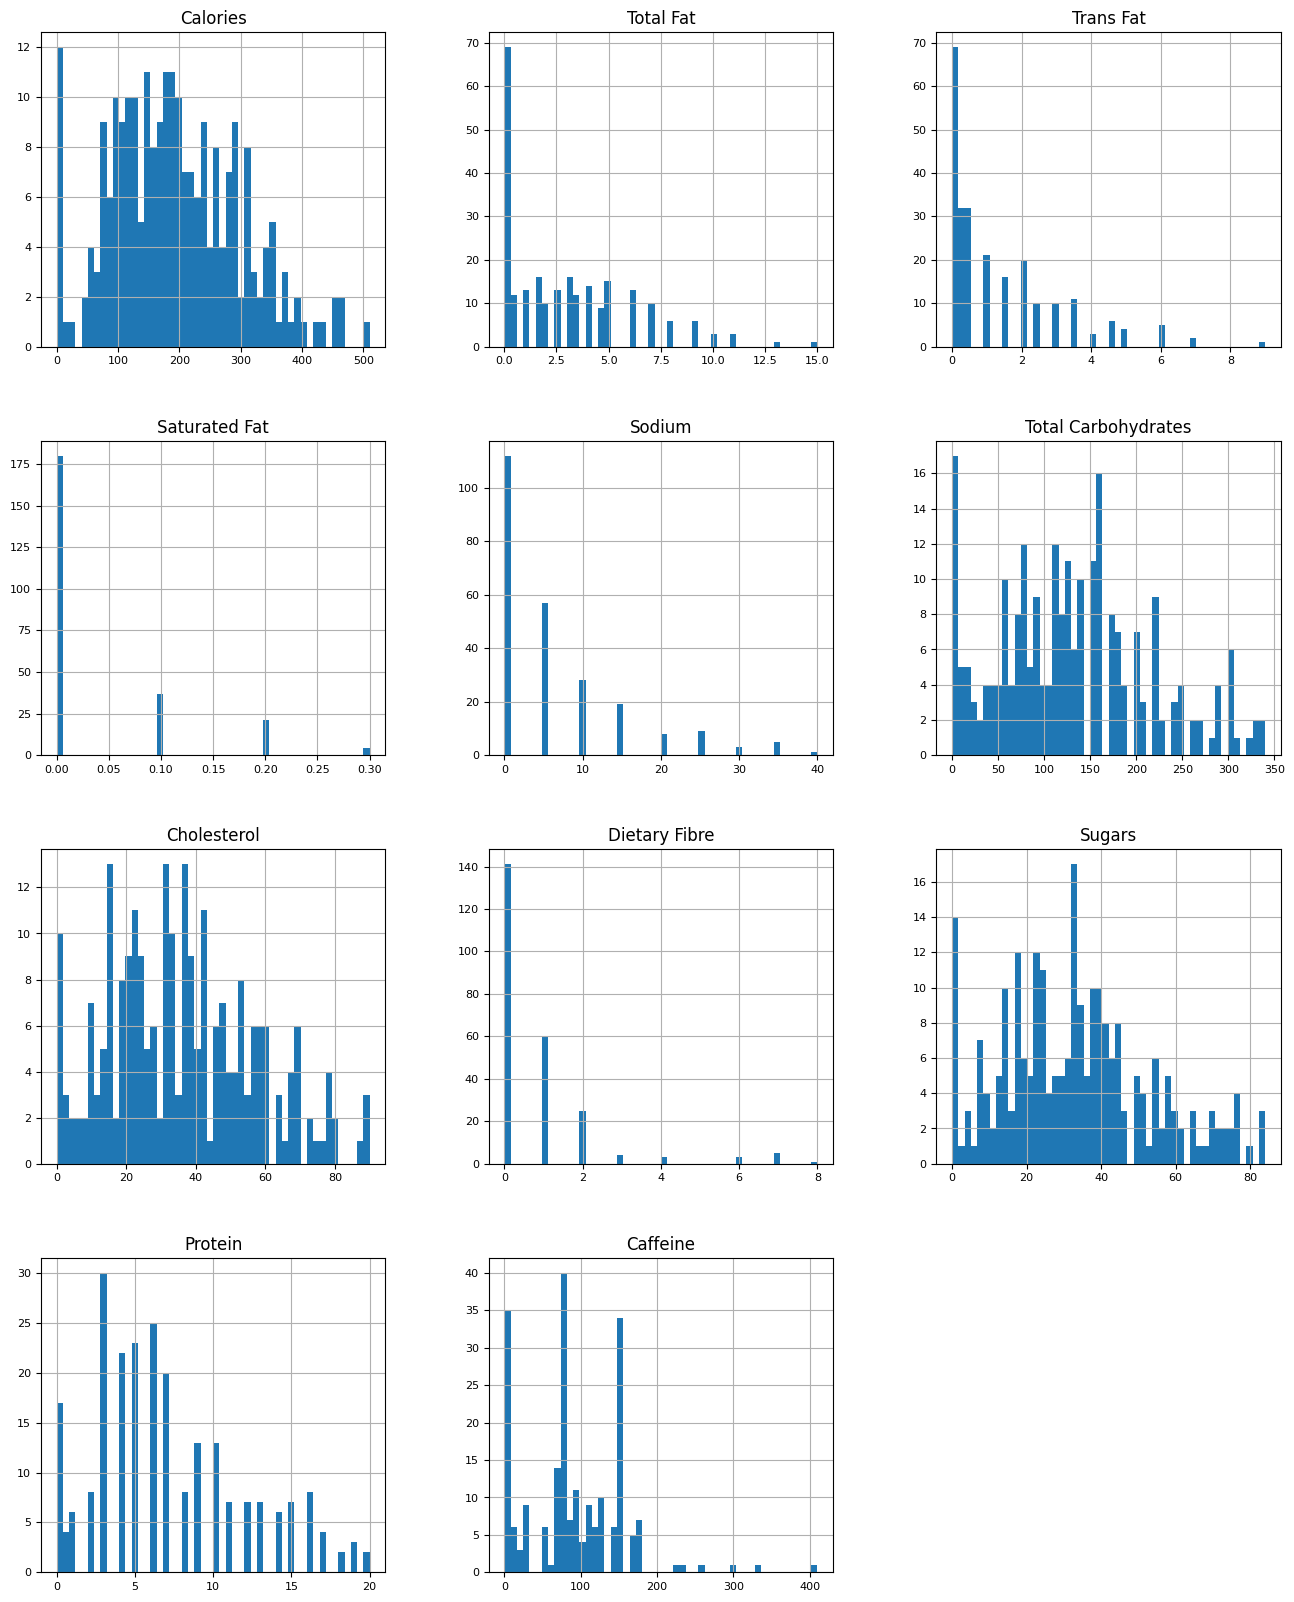

In [73]:
sb_full_menu.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

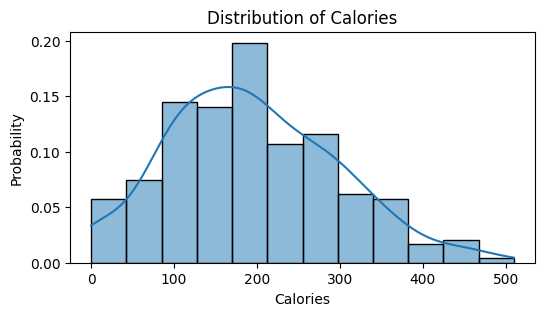

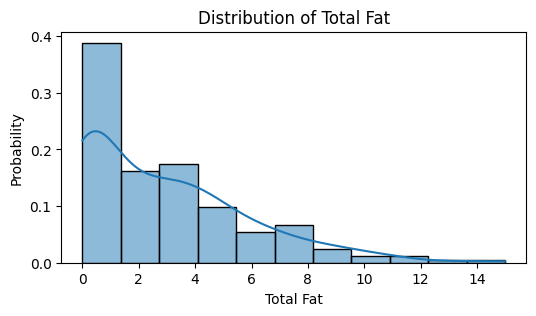

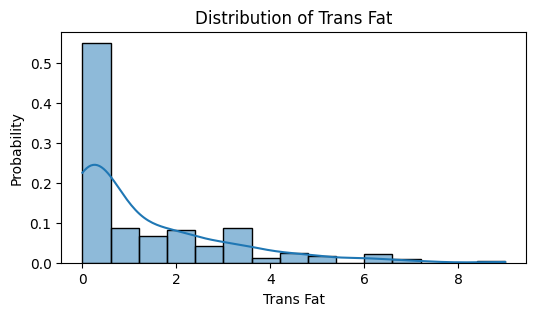

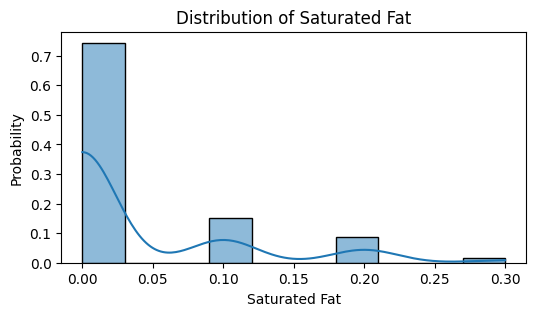

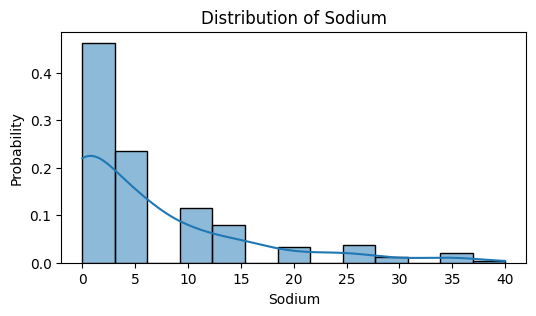

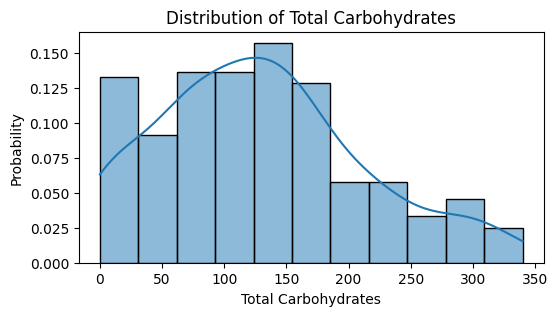

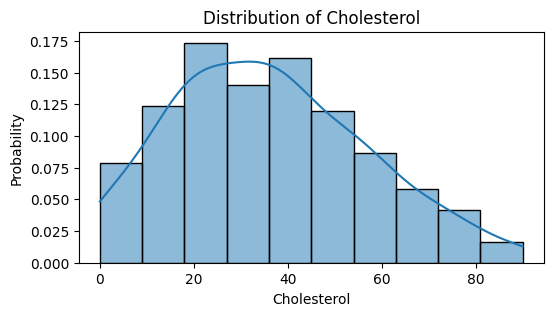

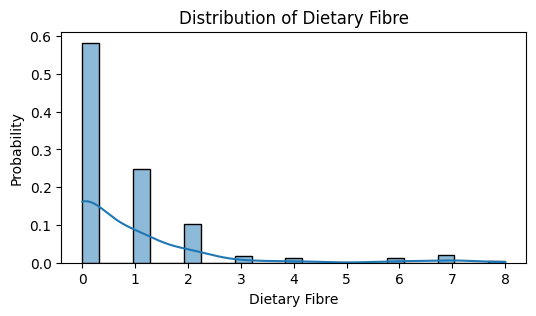

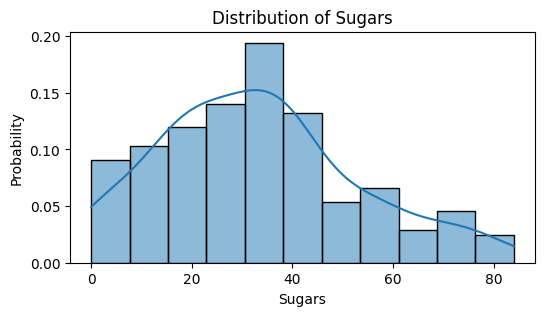

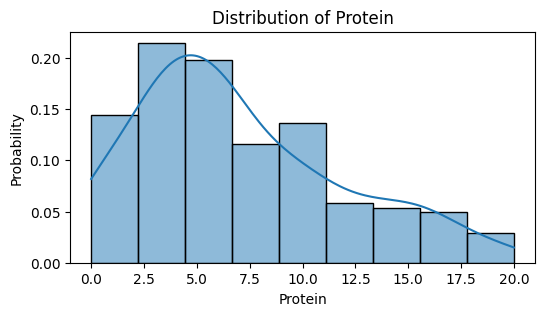

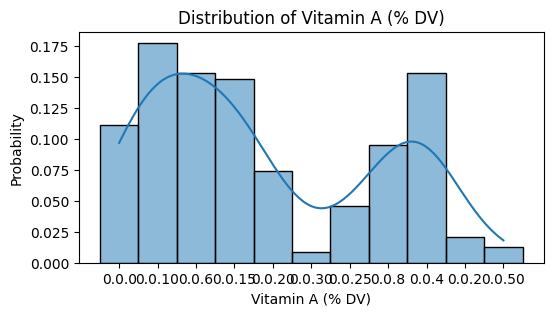

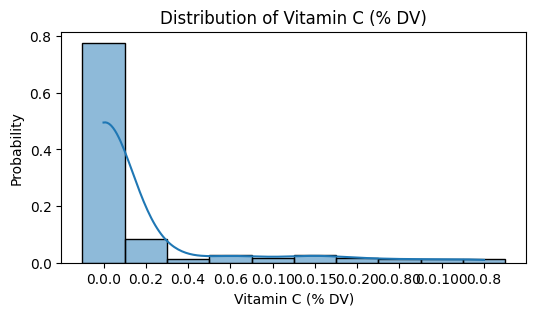

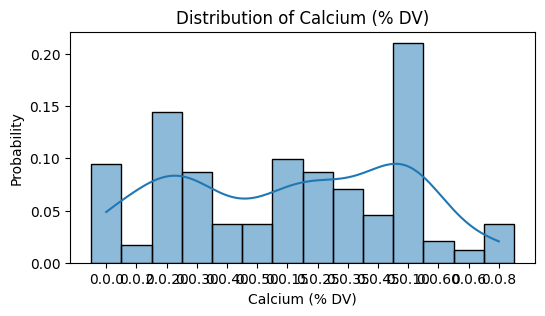

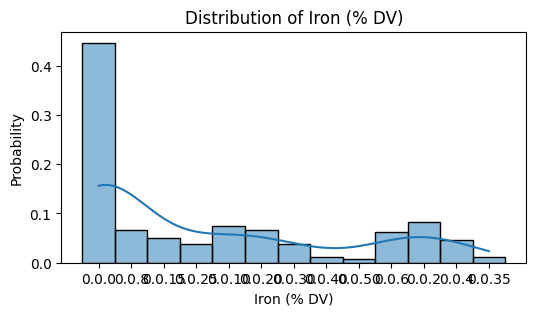

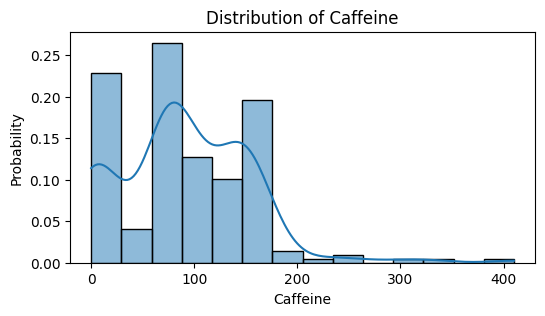

In [76]:
for col in sb_full_menu.iloc[:, 3:].columns:
    plt.figure(figsize=(6, 3)) # Set size of histograms
    sns.histplot(data=sb_full_menu, x=col, kde=True, stat='probability').set_title('Distribution of ' + col) # Create histogram
    plt.show()

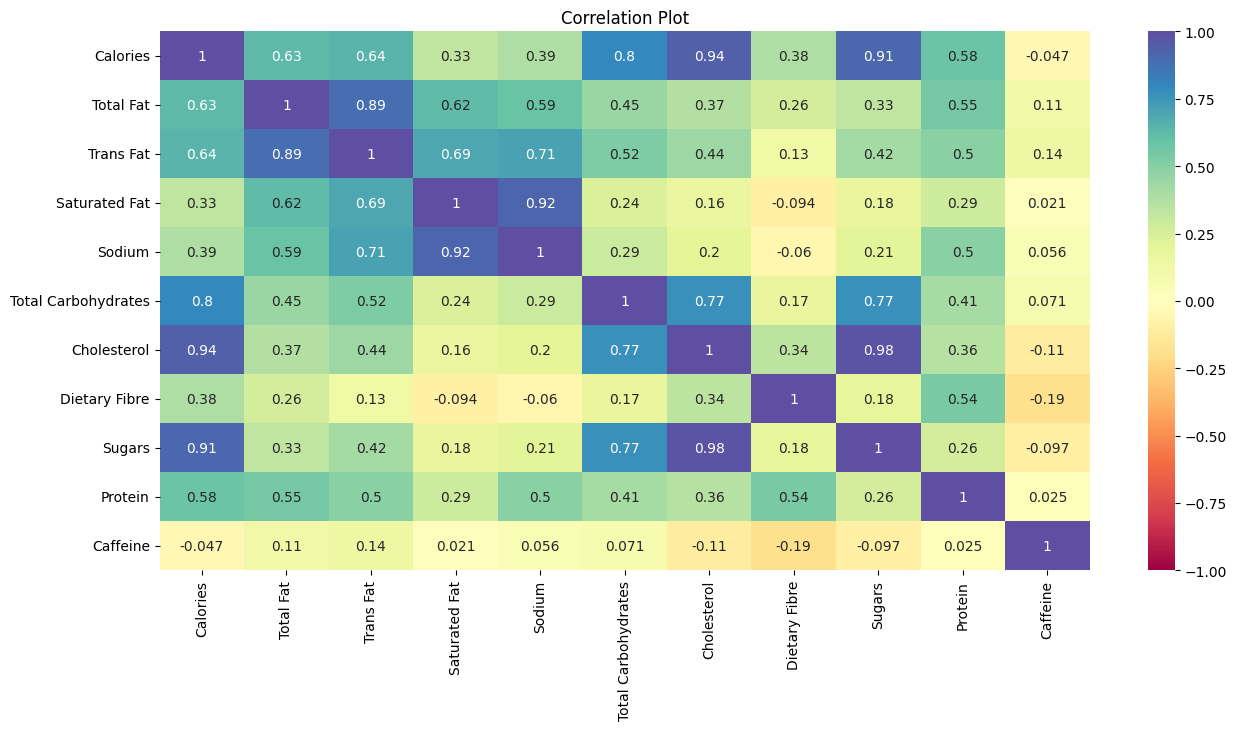

In [78]:
sb_full_menu = sb_full_menu.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(sb_full_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot of the full menu")


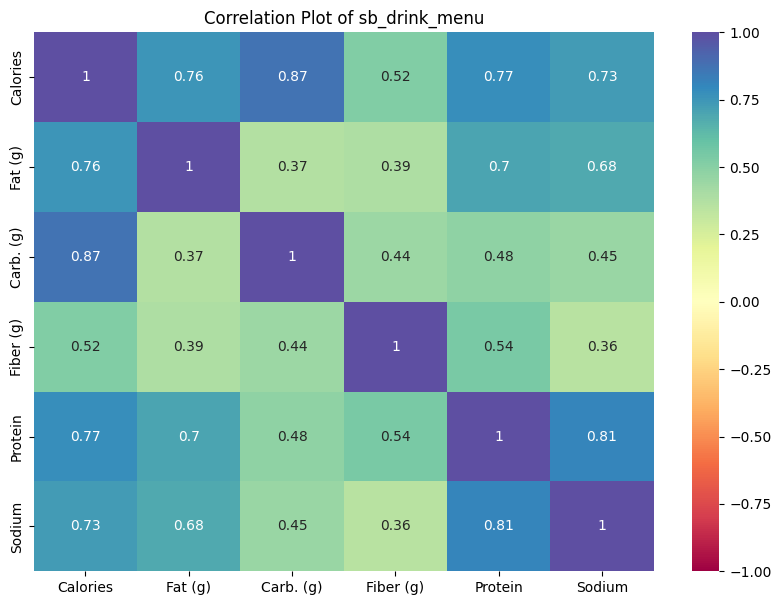

In [81]:
sb_drink_menu = sb_drink_menu.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(10, 7))
corrplot = sns.heatmap(sb_drink_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot of sb_drink_menu")
plt.show()

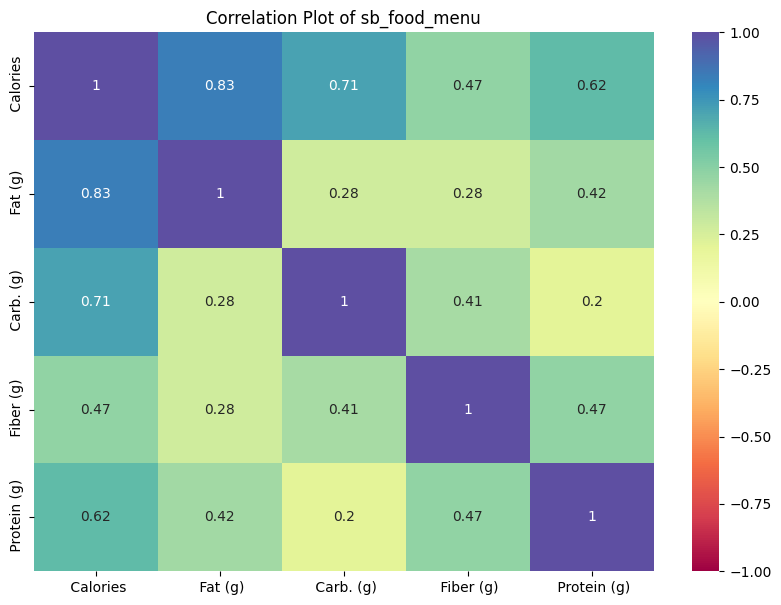

In [82]:
sb_food_menu = sb_food_menu.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(10, 7))
corrplot = sns.heatmap(sb_food_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot of sb_food_menu")
plt.show()